# Explore here

In [39]:
import pandas as pd

df = pd.read_csv(r'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv', delimiter=',')
pd.set_option('display.max_columns', None)
df

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    11.896628   3268                 13.134520   3201   
3                    11.589286   3029                 13.522321   3113   
4                    13.087828   6742                 11.656293   6884   
...                        ...    ...                       ...    ...   
3135                 14.694200   5359                 12.448027   6577   
3136                  9.466661   2967                 12.854729   4093   
3137                 15.788955   2153                 10.606434   2702   
3138                 14.115409    715                  9.067850    903   
3139                 11.181283    681                  9.774652    906   

      30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  \
0                    12.749771   7582                 13.636445   7738   
1                    11.564429  27338                 12.539102  29986   
2                    12.865239   3074                 12.354809   3278   
3                    13.897321   3038                 13.562500   3115   
4                    11.901798   7474                 12.921853   7844   
...                        ...    ...                       ...    ...   
3135                 15.277229   5334                 12.389956   5261   
3136                 17.733200   3423                 14.830380   2928   
3137                 13.311001   2390                 11.773979   2434   
3138                 11.452124    900                 11.414077   1085   
3139                 13.004162    734                 10.535381    986   

      50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  \
0                    13.917016   5826                 10.478229   4050   
1                    13.753658  29932                 13.728890  20936   
2                    13.174712   3076                 12.362847   2244   
3                    13.906250   2545                 11.361607   1723   
4                    13.561549   6965                 12.041840   4931   
...                        ...    ...                       ...    ...   
3135                 12.220390   4943                 11.481731   2198   
3136                 12.685759   2875                 12.456133   1569   
3137                 11.990738   2554                 12.581901   1233   
3138                 13.760304   1118                 14.178821    741   
3139                 14.152433   1145                 16.434620    560   

      70-79 y/o % of total pop   80+  80+ y/o % of total pop  White-alone pop  \
0                     7.284042  2014                3.622237            42660   
1                     9.602701  9368                4.296814           190301   
2                     9.018930  1048                4.212049            12209   
3                     7.691964   785                3.504464            17211   
4                     8.525242  2335                4.036999            55456   
...                        ...   ...                     ...              ...   
3135            

In [40]:
# Crear la columna objetivo binaria
df['y'] = (df['diabetes_prevalence']) #eligo esta variable para relacionarse con las demas de salud, info etnica y demografica y establecer la prevalencia de la diabetes 

In [41]:
import re

# Definir una función para limpiar los nombres de las columnas
def limpiar_nombres_columnas(nombre_columna):
    return re.sub(r'[^a-zA-Z0-9\s]', '', nombre_columna)

# Eliminar espacios en blanco al principio y al final de los nombres de las columnas
df.columns = df.columns.str.strip()

# Aplicar la función a todos los nombres de las columnas del DataFrame
df = df.rename(columns=limpiar_nombres_columnas)

In [42]:
# Función para eliminar espacios en blanco de los nombres de las columnas
def eliminar_espacios(columna):
    return columna.strip()

# Aplicar la función a los nombres de las columnas
df.columns = df.columns.map(eliminar_espacios)

# Aplicar la función para limpiar los nombres de las columnas
df = df.rename(columns=limpiar_nombres_columnas)

In [43]:
import numpy as np

df.isna().sum()
df.head(1)

fips  TOTPOP    09  09 yo  of total pop  19Oct  1019 yo  of total pop  \
0  1001   55601  6787            12.206615   7637              13.735364   

   2029  2029 yo  of total pop  3039  3039 yo  of total pop  4049  \
0  6878              12.370281  7089              12.749771  7582   

   4049 yo  of total pop  5059  5059 yo  of total pop  6069  \
0              13.636445  7738              13.917016  5826   

   6069 yo  of total pop  7079  7079 yo  of total pop    80  \
0              10.478229  4050               7.284042  2014   

   80 yo  of total pop  Whitealone pop  Whitealone  Blackalone pop  \
0             3.622237           42660   76.725239           10915   

   Blackalone  Native AmericanAmerican Indianalone pop  NAAIalone  \
0   19.630942                                      267   0.480207   

   Asianalone pop  Asianalone  HawaiianPacific Islanderalone pop  \
0             681    1.224798                                 62   

   HawaiianPIalone  Two or more races pop  Two or more races  POPESTIMATE2018  \
0         0.111509                   1016           1.827305            55601   

   NPOPCHG2018  GQESTIMATES2018  Rbirth2018  Rdeath2018  RNATURALINC2018  \
0          158              455        11.8         9.6              2.2   

   RINTERNATIONALMIG2018  RDOMESTICMIG2018  RNETMIG2018  \
0                    0.0               0.7          0.6   

   Less than a high school diploma 201418  High school diploma only 201418  \
0                                    4204                            12119   

   Some college or associates degree 201418  \
0                                     10552   

   Bachelors degree or higher 201418  \
0                              10291   

   Percent of adults with less than a high school diploma 201418  \
0                                               11.3               

   Percent of adults with a high school diploma only 201418  \
0                                               32.6          

   Percent of adults completing some college or associates degree 201418  \
0                                               28.4                       

   Percent of adults with a bachelors degree or higher 201418  POVALL2018  \
0                                               27.7                 7587   

   PCTPOVALL2018  PCTPOV0172018  PCTPOV5172018  MEDHHINC2018  CI90LBINC2018  \
0           13.8           19.3           19.5         59338          53628   

   CI90UBINC2018  Civilianlaborforce2018  Employed2018  Unemployed2018  \
0          65048                   25957         25015             942   

   Unemploymentrate2018  MedianHouseholdIncome2018  \
0                   3.6                      59338   

   MedHHIncomePercentofStateTotal2018  \
0                               119.0   

   Active Physicians per 100000 Population 2018 AAMC  \
0                                              217.1   

   Total Active Patient Care Physicians per 100000 Population 2018 AAMC  \
0                                              196.7                      

   Active Primary Care Physicians per 100000 Population 2018 AAMC  \
0                                               77.2                

   Active Patient Care Primary Care Physicians per 100000 Population 2018 AAMC  \
0                                               71.2                             

   Active General Surgeons per 100000 Population 2018 AAMC  \
0                                                7.6         

   Active Patient Care General Surgeons per 100000 Population 2018 AAMC  \
0                                                6.9                      

   Total nurse practitioners 2019  Total physician assistants 2019  \
0                       28.859137                         6.085786   

   Total Hospitals 2019  Internal Medicine Primary Care 2019  \
0              1.148905                            25.992561   

   Family MedicineGeneral Practice Primary Care 2019  \
0                             

In [44]:
for columna in df.columns:
    print(columna)

fips
TOTPOP
09
09 yo  of total pop
19Oct
1019 yo  of total pop
2029
2029 yo  of total pop
3039
3039 yo  of total pop
4049
4049 yo  of total pop
5059
5059 yo  of total pop
6069
6069 yo  of total pop
7079
7079 yo  of total pop
80
80 yo  of total pop
Whitealone pop
Whitealone
Blackalone pop
Blackalone
Native AmericanAmerican Indianalone pop
NAAIalone
Asianalone pop
Asianalone
HawaiianPacific Islanderalone pop
HawaiianPIalone
Two or more races pop
Two or more races
POPESTIMATE2018
NPOPCHG2018
GQESTIMATES2018
Rbirth2018
Rdeath2018
RNATURALINC2018
RINTERNATIONALMIG2018
RDOMESTICMIG2018
RNETMIG2018
Less than a high school diploma 201418
High school diploma only 201418
Some college or associates degree 201418
Bachelors degree or higher 201418
Percent of adults with less than a high school diploma 201418
Percent of adults with a high school diploma only 201418
Percent of adults completing some college or associates degree 201418
Percent of adults with a bachelors degree or higher 201418
POVALL2

In [45]:
#cols_delete = ['NAAIalone', 'Two or more races pop', '09', '19Oct', '2029', '3039', '4049', '5059', '6069', '7079', '80', 'Unemploymentrate2018', 'POPESTIMATE2018', 'NPOPCHG2018', 'GQESTIMATES2018', 'RNATURALINC2018', 'RNATURALINC2018', 'RINTERNATIONALMIG2018', 'RNETMIG2018', 'Percent of adults with less than a high school diploma 201418', 'Percent of adults with a high school diploma only 201418', 'Percent of adults completing some college or associates degree 201418', 'Percent of adults with a bachelors degree or higher 201418', 'POVALL2018', 'PCTPOVALL2018', 'PCTPOV0172018', 'PCTPOV5172018', 'MEDHHINC2018', 'CI90LBINC2018', 'CI90UBINC2018', 'Employed2018', 'Unemployed2018', 'Active Physicians per 100000 Population 2018 AAMC', 'Total Active Patient Care Physicians per 100000 Population 2018 AAMC', 'Active Primary Care Physicians per 100000 Population 2018 AAMC', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 AAMC', 'Active Patient Care General Surgeons per 100000 Population 2018 AAMC', 'Total nurse practitioners 2019', 'Total physician assistants 2019', 'Total Hospitals 2019', 'Internal Medicine Primary Care 2019', 'Family MedicineGeneral Practice Primary Care 2019', 'Total Specialist Physicians 2019', 'Percent of Population Aged 60', 'STATEFIPS', 'anyconditionprevalence', 'countypop201818 and older']
#df.reset_index(drop=True, inplace=True)
#df = df.drop(columns=cols_delete)
#df

In [46]:
if 'Autauga' in df['TOTPOP'].values:
    print ('Se encontraron valores unknown')
else:
    print('No se encontraron valores unknown')

#No tengo cols con valores unknown

No se encontraron valores unknown


In [47]:
df[['COUNTYNAME']].groupby('COUNTYNAME').sum()

Empty DataFrame
Columns: []
Index: [Abbeville, Acadia, Accomack, Ada, Adair, Adams, Addison, Aiken, Aitkin, Alachua, Alamance, Alameda, Alamosa, Albany, Albemarle, Alcona, Alcorn, Aleutians West, Alexander, Alexandria, Alfalfa, Alger, Allamakee, Allegan, Allegany, Alleghany, Allegheny, Allen, Allendale, Alpena, Alpine, Amador, Amelia, Amherst, Amite, Anchorage, Anderson, Andrew, Andrews, Androscoggin, Angelina, Anne Arundel, Anoka, Anson, Antelope, Antrim, Apache, Appanoose, Appling, Appomattox, Aransas, Arapahoe, Archer, Archuleta, Arenac, Arkansas, Arlington, Armstrong, Aroostook, Arthur, Ascension, Ashe, Ashland, Ashley, Ashtabula, Asotin, Assumption, Atascosa, Atchison, Athens, Atkinson, Atlantic, Atoka, Attala, Audrain, Audubon, Auglaize, Augusta, Aurora, Austin, Autauga, Avery, Avoyelles, Baca, Bacon, Bailey, Baker, Baldwin, Ballard, Baltimore City, Baltimore County, Bamberg, Bandera, Banks, Banner, Bannock, Baraga, Barber, Barbour, Barnes, ...]

[1841 rows x 0 columns]

In [48]:
# Obtener los valores únicos y asignarles valores numéricos
# Crear un diccionario de mapeo para asignar un número único a cada condado
mapeo_condados = {condado: idx for idx, condado in enumerate(df['COUNTYNAME'].unique())}

# Mapear los condados a sus números correspondientes en la columna existente
df['COUNTYNAME'] = df['COUNTYNAME'].map(mapeo_condados)


In [49]:
# Obtener los valores únicos y asignarles valores numéricos
# Crear un diccionario de mapeo para asignar un número único a cada condado
mapeo_condados = {condado: idx for idx, condado in enumerate(df['STATENAME'].unique())}

# Mapear los condados a sus números correspondientes en la columna existente
df['STATENAME'] = df['STATENAME'].map(mapeo_condados)
df

fips  TOTPOP     09  09 yo  of total pop  19Oct  1019 yo  of total pop  \
0      1001   55601   6787            12.206615   7637              13.735364   
1      1003  218022  24757            11.355276  26913              12.344167   
2      1005   24881   2732            10.980266   2960              11.896628   
3      1007   22400   2456            10.964286   2596              11.589286   
4      1009   57840   7095            12.266598   7570              13.087828   
...     ...     ...    ...                  ...    ...                    ...   
3135  56037   43051   6104            14.178532   6326              14.694200   
3136  56039   23081   2384            10.328842   2185               9.466661   
3137  56041   20299   3121            15.375142   3205              15.788955   
3138  56043    7885    858            10.881420   1113              14.115409   
3139  56045    6967    780            11.195637    779              11.181283   

       2029  2029 yo  of total pop   3039  3039 yo  of total pop   4049  \
0      6878              12.370281   7089              12.749771   7582   
1     23579              10.814964  25213              11.564429  27338   
2      3268              13.134520   3201              12.865239   3074   
3      3029              13.522321   3113              13.897321   3038   
4      6742              11.656293   6884              11.901798   7474   
...     ...                    ...    ...                    ...    ...   
3135   5359              12.448027   6577              15.277229   5334   
3136   2967              12.854729   4093              17.733200   3423   
3137   2153              10.606434   2702              13.311001   2390   
3138    715               9.067850    903              11.452124    900   
3139    681               9.774652    906              13.004162    734   

      4049 yo  of total pop   5059  5059 yo  of total pop   6069  \
0                 13.636445   7738              13.917016   5826   
1                 12.539102  29986              13.753658  29932   
2                 12.354809   3278              13.174712   3076   
3                 13.562500   3115              13.906250   2545   
4                 12.921853   7844              13.561549   6965   
...                     ...    ...                    ...    ...   
3135              12.389956   5261              12.220390   4943   
3136              14.830380   2928              12.685759   2875   
3137              11.773979   2434              11.990738   2554   
3138              11.414077   1085              13.760304   1118   
3139              10.535381    986              14.152433   1145   

      6069 yo  of total pop   7079  7079 yo  of total pop    80  \
0                 10.478229   4050               7.284042  2014   
1                 13.728890  20936               9.602701  9368   
2                 12.362847   2244               9.018930  1048   
3                 11.361607   1723               7.691964   785   
4                 12.041840   4931               8.525242  2335   
...                     ...    ...                    ...   ...   
3135              11.481731   2198               5.105572   949   
3136              12.456133   1569               6.797799   657   
3137              12.581901   1233               6.074191   507   
3138              14.178821    741               9.397590   452   
3139              16.434620    560               8.037893   396   

      80 yo  of total pop  Whitealone pop  Whitealone  Blackalone pop  \
0                3.622237           42660   76.725239           10915   
1                4.296814          190301   87.285228           19492   
2                4.212049           12209   49.069571           12042   
3                3.504464           17211   76.834821            4770   
4                4.036999           55456   95.878285             950   
...                   ...             ...         ...             ...   


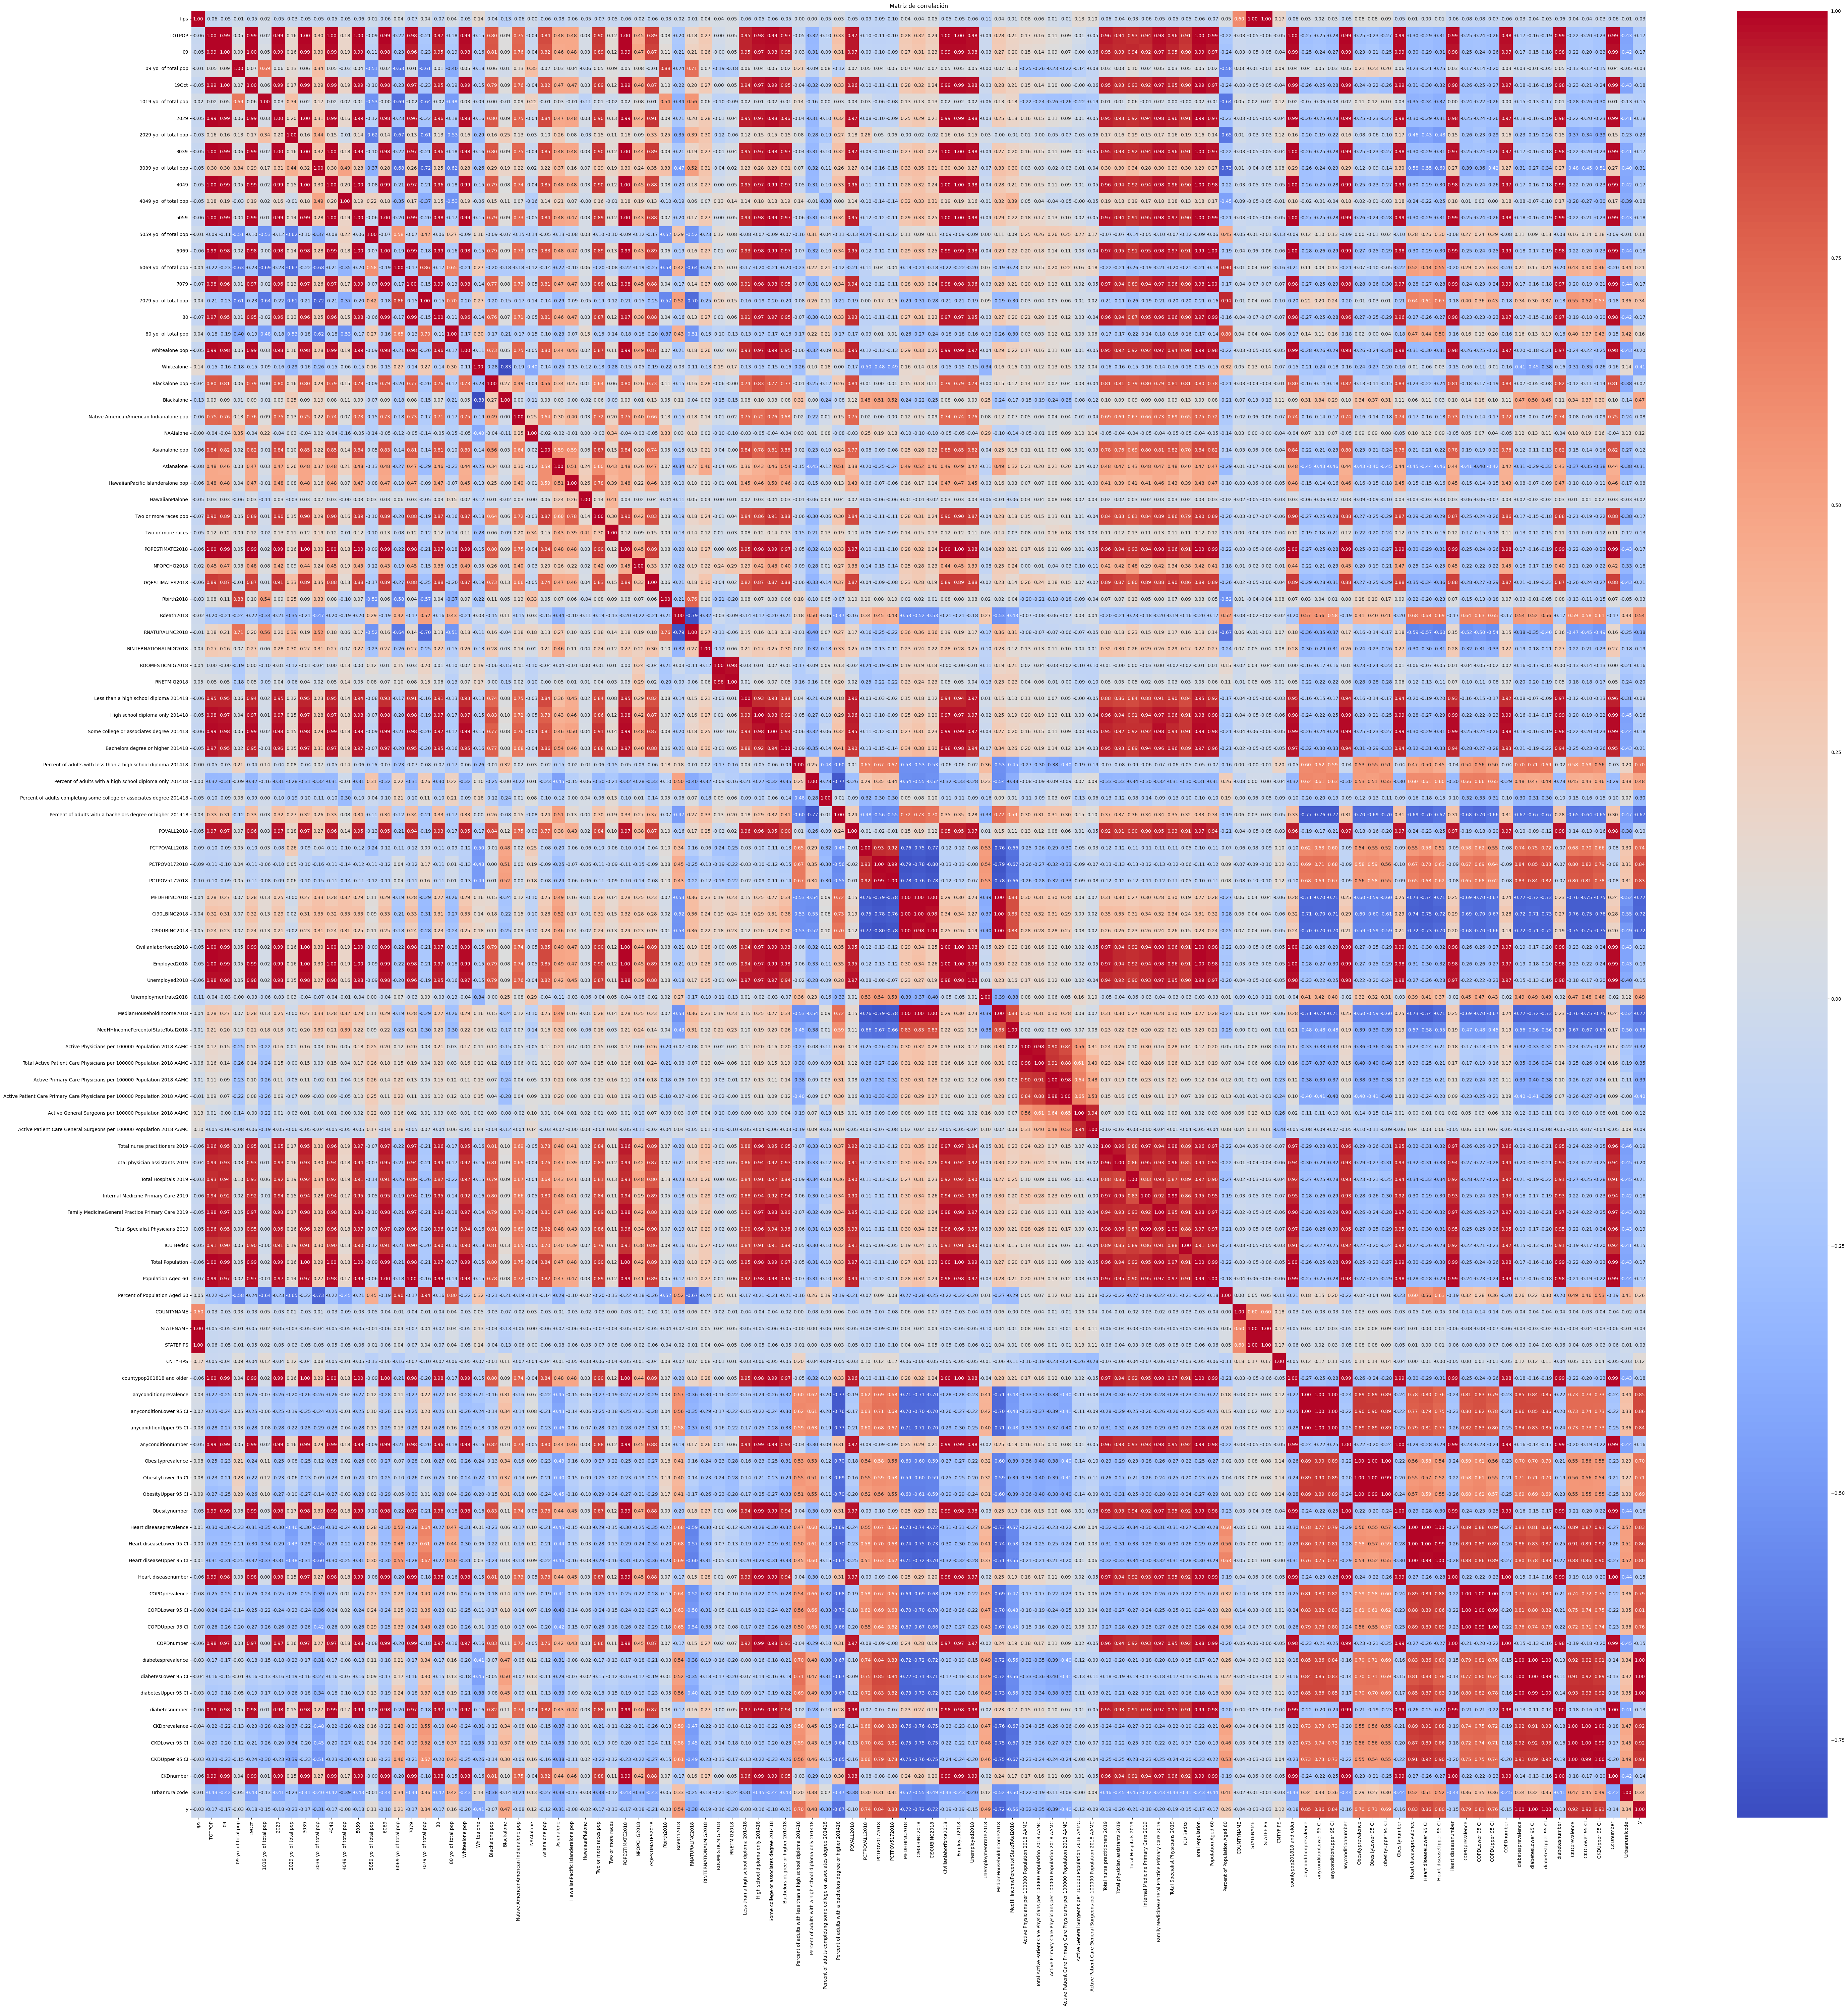

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(70, 70))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [51]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Añadir una constante al DataFrame (intercepto)
df_with_const = add_constant(df)

# Calcular el VIF para cada característica
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]
vif_data

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Feature           VIF
0                  const  0.000000e+00
1                   fips  1.429946e+10
2                 TOTPOP  7.340831e+12
3                     09  6.442918e+11
4    09 yo  of total pop           inf
..                   ...           ...
105       CKDLower 95 CI  2.139239e+02
106       CKDUpper 95 CI  2.620534e+02
107            CKDnumber  3.289456e+03
108       Urbanruralcode  2.591476e+00
109                    y  6.940007e+09

[110 rows x 2 columns]

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Estandarización (Z-score normalization)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Normalización min-max
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Imprimir los primeros registros de los DataFrames normalizados
print("DataFrame Estandarizado:")
print(df_standardized.head())

print("\nDataFrame Normalizado:")
print(df_normalized.head())

DataFrame Estandarizado:
       fips    TOTPOP        09  09 yo  of total pop     19Oct  \
0 -1.940874 -0.145679 -0.142421             0.158006 -0.135556   
1 -1.940742  0.341296  0.287476            -0.242861  0.320383   
2 -1.940610 -0.237785 -0.239429            -0.419441 -0.246181   
3 -1.940478 -0.245223 -0.246032            -0.426966 -0.254791   
4 -1.940346 -0.138966 -0.135053             0.186249 -0.137140   

   1019 yo  of total pop      2029  2029 yo  of total pop      3039  \
0               0.573496 -0.153144               0.027610 -0.139384   
1              -0.193107  0.183774              -0.469965  0.230620   
2              -0.439718 -0.225971               0.272104 -0.218759   
3              -0.609076 -0.230792               0.396168 -0.220555   
4               0.216679 -0.155888              -0.200808 -0.143570   

   3039 yo  of total pop      4049  4049 yo  of total pop      5059  \
0               0.588469 -0.122010               1.515069 -0.138129   
1        

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['y'])
y = df['y']

# Crear un modelo de regresión lineal
modelo_regresion = LinearRegression()

# Crear un selector de características utilizando RFE
selector_caracteristicas = RFE(modelo_regresion, n_features_to_select=len(X.columns) - 15)  # Especifica el número de características a seleccionar

# Aplicar el selector de características a tus datos
selector_caracteristicas.fit(X, y)

# Obtener los nombres de las columnas originales
nombres_columnas = X.columns

# Obtener las características seleccionadas y sus nombres de columna
caracteristicas_seleccionadas = nombres_columnas[selector_caracteristicas.support_]

# Imprimir las características seleccionadas
print(caracteristicas_seleccionadas)


Index(['fips', 'TOTPOP', '09', '09 yo  of total pop', '19Oct',
       '1019 yo  of total pop', '2029', '2029 yo  of total pop', '3039',
       '3039 yo  of total pop', '4049', '4049 yo  of total pop', '5059',
       '5059 yo  of total pop', '6069', '6069 yo  of total pop', '7079',
       '7079 yo  of total pop', '80', '80 yo  of total pop', 'Whitealone pop',
       'Whitealone', 'Blackalone pop', 'Blackalone',
       'Native AmericanAmerican Indianalone pop', 'NAAIalone',
       'Asianalone pop', 'Asianalone', 'HawaiianPacific Islanderalone pop',
       'HawaiianPIalone', 'Two or more races pop', 'Two or more races',
       'POPESTIMATE2018', 'Rbirth2018', 'Rdeath2018', 'RNATURALINC2018',
       'RINTERNATIONALMIG2018', 'RDOMESTICMIG2018', 'RNETMIG2018',
       'Some college or associates degree 201418',
       'Percent of adults with less than a high school diploma 201418',
       'Percent of adults with a high school diploma only 201418',
       'Percent of adults completing some col

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar características (X) y objetivo (y)
X = df.drop(columns=['y'])
y = df['y']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo de regresión lineal
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

# Evaluar el modelo de regresión lineal
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse*100)
print("Coeficiente de determinación (R^2):", r2*100)
#el modelo de regresion linear estandar tiene una precision predictiva mayor que la de lasso y tambien un error cuadratico menor. aun asi el 42% no es demasiado eficiente.


Error cuadrático medio (MSE): 1.927507358441433e-23
Coeficiente de determinación (R^2): 100.0


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar características (X) y objetivo (y)
X = df.drop(columns=['y'])
y = df['y']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo Lasso
modelo_lasso = Lasso(alpha=1.0)  # Puedes ajustar el hiperparámetro alpha según sea necesario

# Entrenar el modelo Lasso
modelo_lasso.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_lasso.predict(X_test)

# Evaluar el modelo Lasso
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse*100)
print("Coeficiente de determinación (R^2):", r2*100)
#al reducir las cols el modelo regular mantiene un 35% pero el lasso disminuye a 18%, mientras que con todas las cols aumenta a 24%

Error cuadrático medio (MSE): 62.063324110529315
Coeficiente de determinación (R^2): 92.28370613039425


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.766e+03, tolerance: 1.823e+00
  model = cd_fast.enet_coordinate_descent(


In [56]:
import numpy as np

# Obtener los coeficientes del modelo Lasso
coeficientes = modelo_lasso.coef_

# Obtener los nombres de las características
nombres_caracteristicas = X.columns

# Crear un DataFrame para visualizar los coeficientes junto con los nombres de las características
coeficientes_df = pd.DataFrame({'Característica': nombres_caracteristicas, 'Coeficiente': coeficientes})

# Ordenar los coeficientes por valor absoluto para identificar las características más importantes
coeficientes_df['Abs_Coeficiente'] = np.abs(coeficientes_df['Coeficiente'])
coeficientes_df = coeficientes_df.sort_values(by='Abs_Coeficiente', ascending=False)

# Visualizar las características más importantes
print(coeficientes_df)

                                        Característica  Coeficiente  \
101                                diabetesUpper 95 CI     0.255801   
84                             anyconditionLower 95 CI     0.100672   
52                                       PCTPOV5172018     0.032876   
45   Percent of adults with less than a high school...     0.022018   
51                                       PCTPOV0172018     0.014479   
..                                                 ...          ...   
25                                           NAAIalone     0.000000   
72   Family MedicineGeneral Practice Primary Care 2019    -0.000000   
74                                           ICU Bedsx    -0.000000   
39                                    RDOMESTICMIG2018     0.000000   
107                                     Urbanruralcode     0.000000   

     Abs_Coeficiente  
101         0.255801  
84          0.100672  
52          0.032876  
45          0.022018  
51          0.014479  
..       

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.766e+03, tolerance: 1.823e+00
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e+03, tolerance: 1.823e+00
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

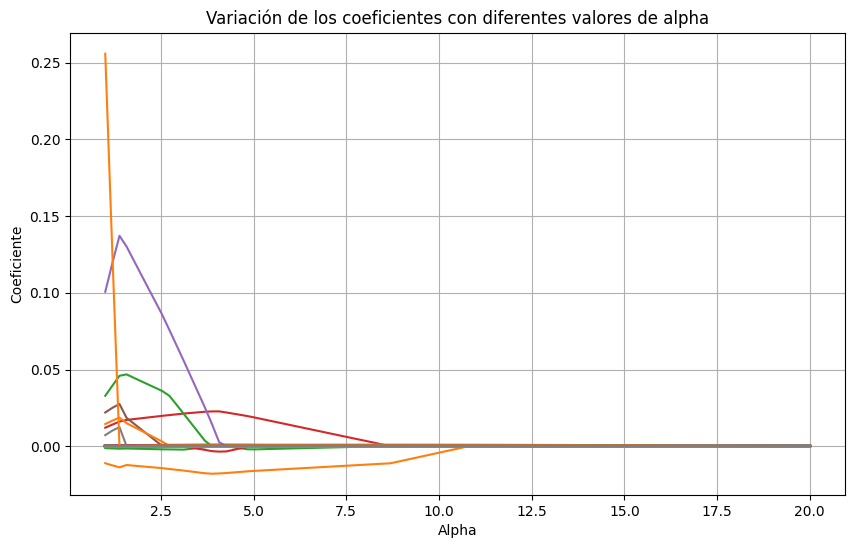

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Valores de alpha que vamos a probar
alphas = np.linspace(1.0, 20.0, 100)

# Lista para almacenar los coeficientes para cada valor de alpha
coeficientes = []

# Iterar sobre los valores de alpha y ajustar un modelo Lasso para cada uno
for alpha in alphas:
    modelo_lasso = Lasso(alpha=alpha)
    modelo_lasso.fit(X_train, y_train)
    coeficientes.append(modelo_lasso.coef_)

# Convertir la lista de coeficientes en un array numpy
coeficientes = np.array(coeficientes)

# Crear el gráfico
plt.figure(figsize=(10, 6))
for i in range(coeficientes.shape[1]):
    plt.plot(alphas, coeficientes[:, i], label=X.columns[i])

plt.xlabel('Alpha')
plt.ylabel('Coeficiente')
plt.title('Variación de los coeficientes con diferentes valores de alpha')
plt.grid(True)
plt.show()